In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('heart.csv', sep = ',')
#df.columns = [col.replace(' ', '_') for col in df.columns]

In [4]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
# Check Data Quality
# One way : (((df.isna()*1).sum())/len(df))*100
(df.isnull().sum()/len(df))

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


<Axes: >

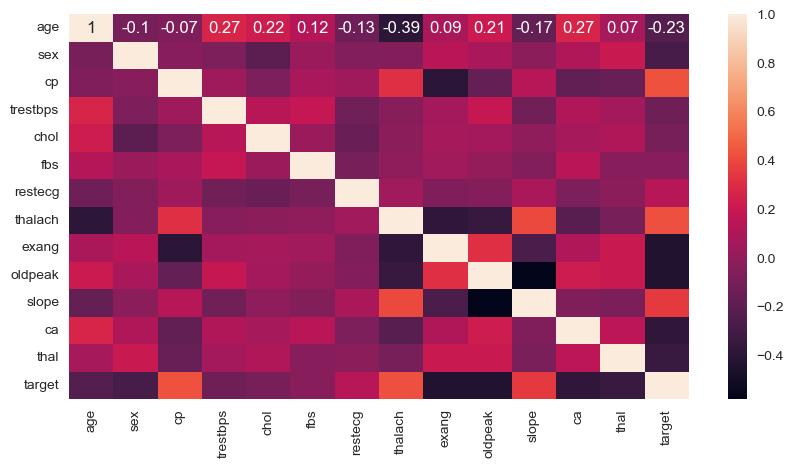

In [10]:
corr = df.corr().round(2)
plt.figure(figsize = (10,5))
sns.heatmap(corr, annot = True )

<Axes: title={'center': 'Variable target'}, xlabel='target', ylabel='count'>

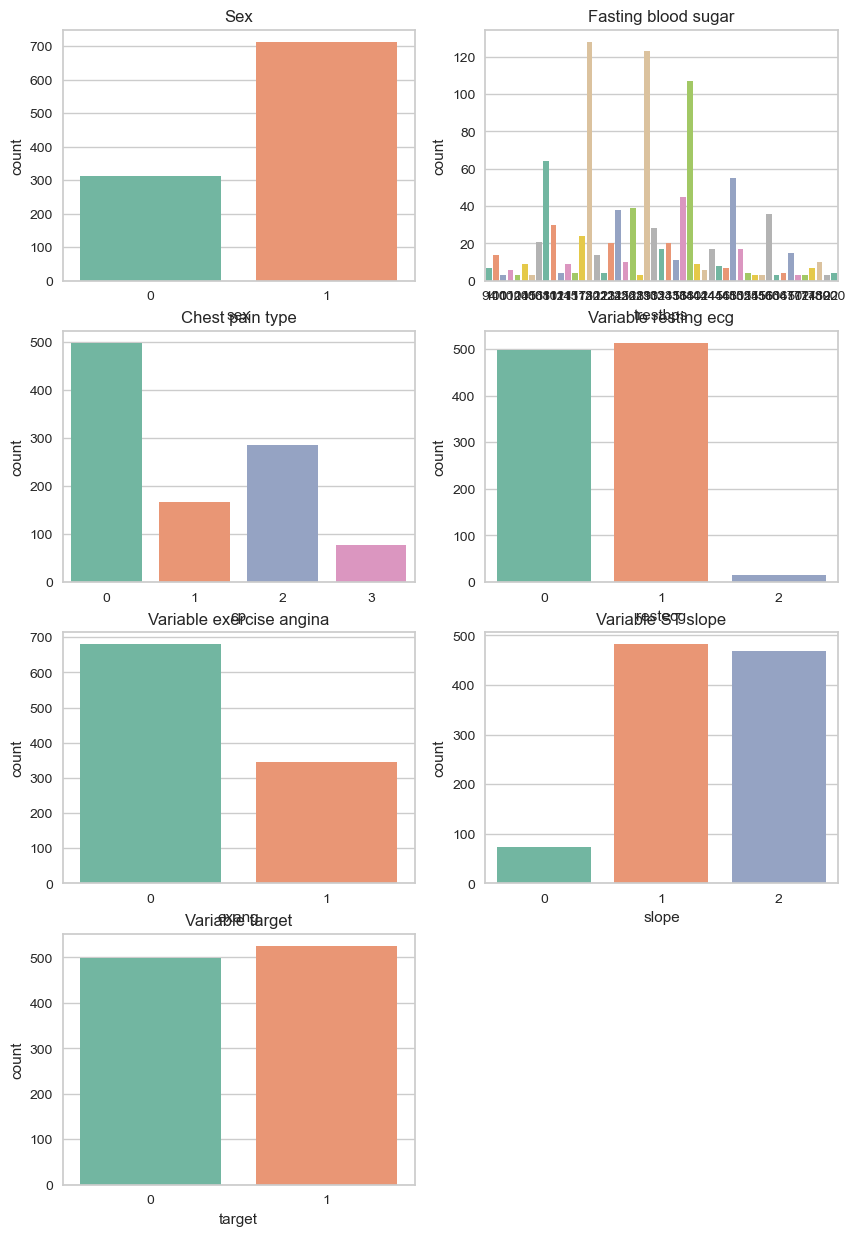

In [46]:
plt.figure(figsize = (10, 15))

plt.subplot(4, 2, 1)
plt.gca().set_title('Sex')
sns.countplot(x = 'sex',  palette = 'Set2', data = df)

plt.subplot(4, 2, 2)
plt.gca().set_title('Fasting blood sugar')
sns.countplot(x = 'trestbps', palette = 'Set2', data = df)

plt.subplot(4, 2, 3) # 4 rows,2, 3 schema in the list
plt.gca().set_title('Chest pain type')
sns.countplot(x = 'cp', palette = 'Set2', data = df)

plt.subplot(4, 2, 4)
plt.gca().set_title('Variable resting ecg')
sns.countplot(x = 'restecg', palette = 'Set2', data = df)

plt.subplot(4, 2, 5)
plt.gca().set_title('Variable exercise angina')
sns.countplot(x = 'exang', palette = 'Set2', data = df)

plt.subplot(4, 2, 6)
plt.gca().set_title('Variable ST slope')
sns.countplot(x = 'slope', palette = 'Set2', data = df)

plt.subplot(4, 2, 7)
plt.gca().set_title('Variable target')
sns.countplot(x = 'target', palette = 'Set2', data = df)

<Axes: xlabel='oldpeak', ylabel='Count'>

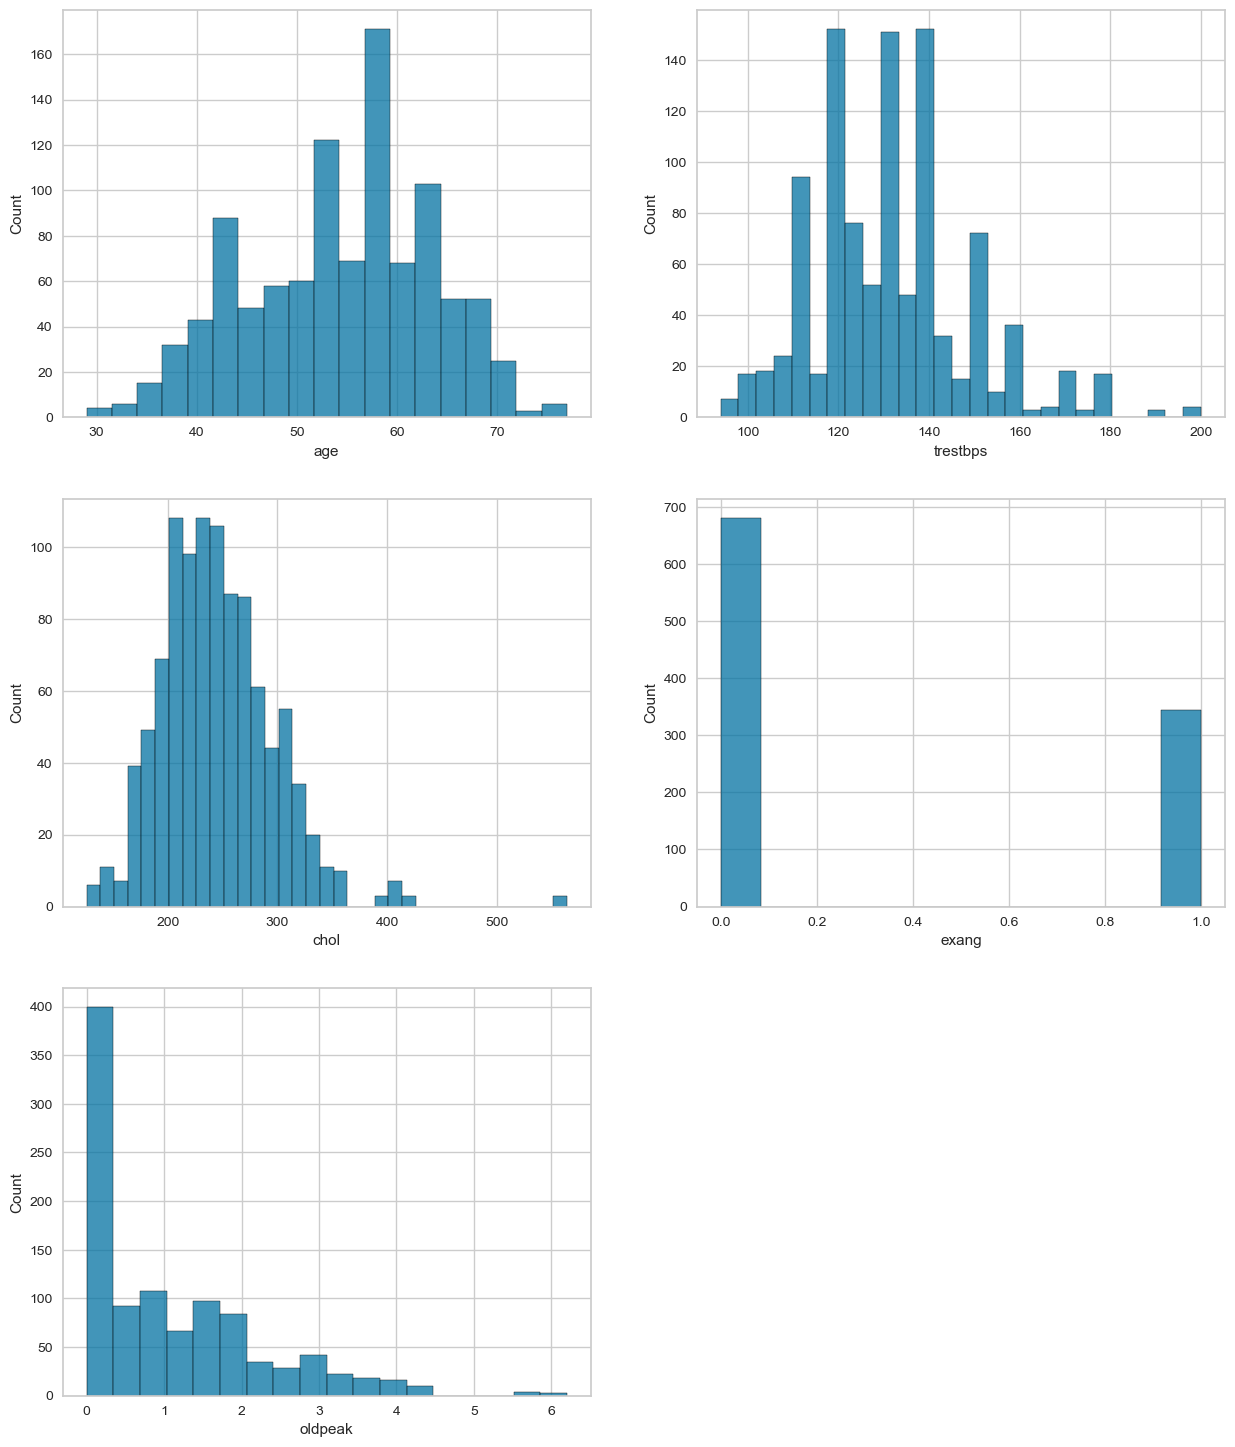

In [53]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

plt.figure(figsize = (15, 18))

plt.subplot(3, 2, 1)
sns.histplot(x = df['age'], kde = False)
    
plt.subplot(3, 2, 2)
sns.histplot(x = df['trestbps'], kde = False)

plt.subplot(3, 2, 3)
sns.histplot(x = df['chol'], kde = False)

plt.subplot(3, 2, 4)
sns.histplot(x = df['exang'], kde = False)

plt.subplot(3, 2, 5)
sns.histplot(x=df['oldpeak'], kde=False)


<Axes: xlabel='target', ylabel='oldpeak'>

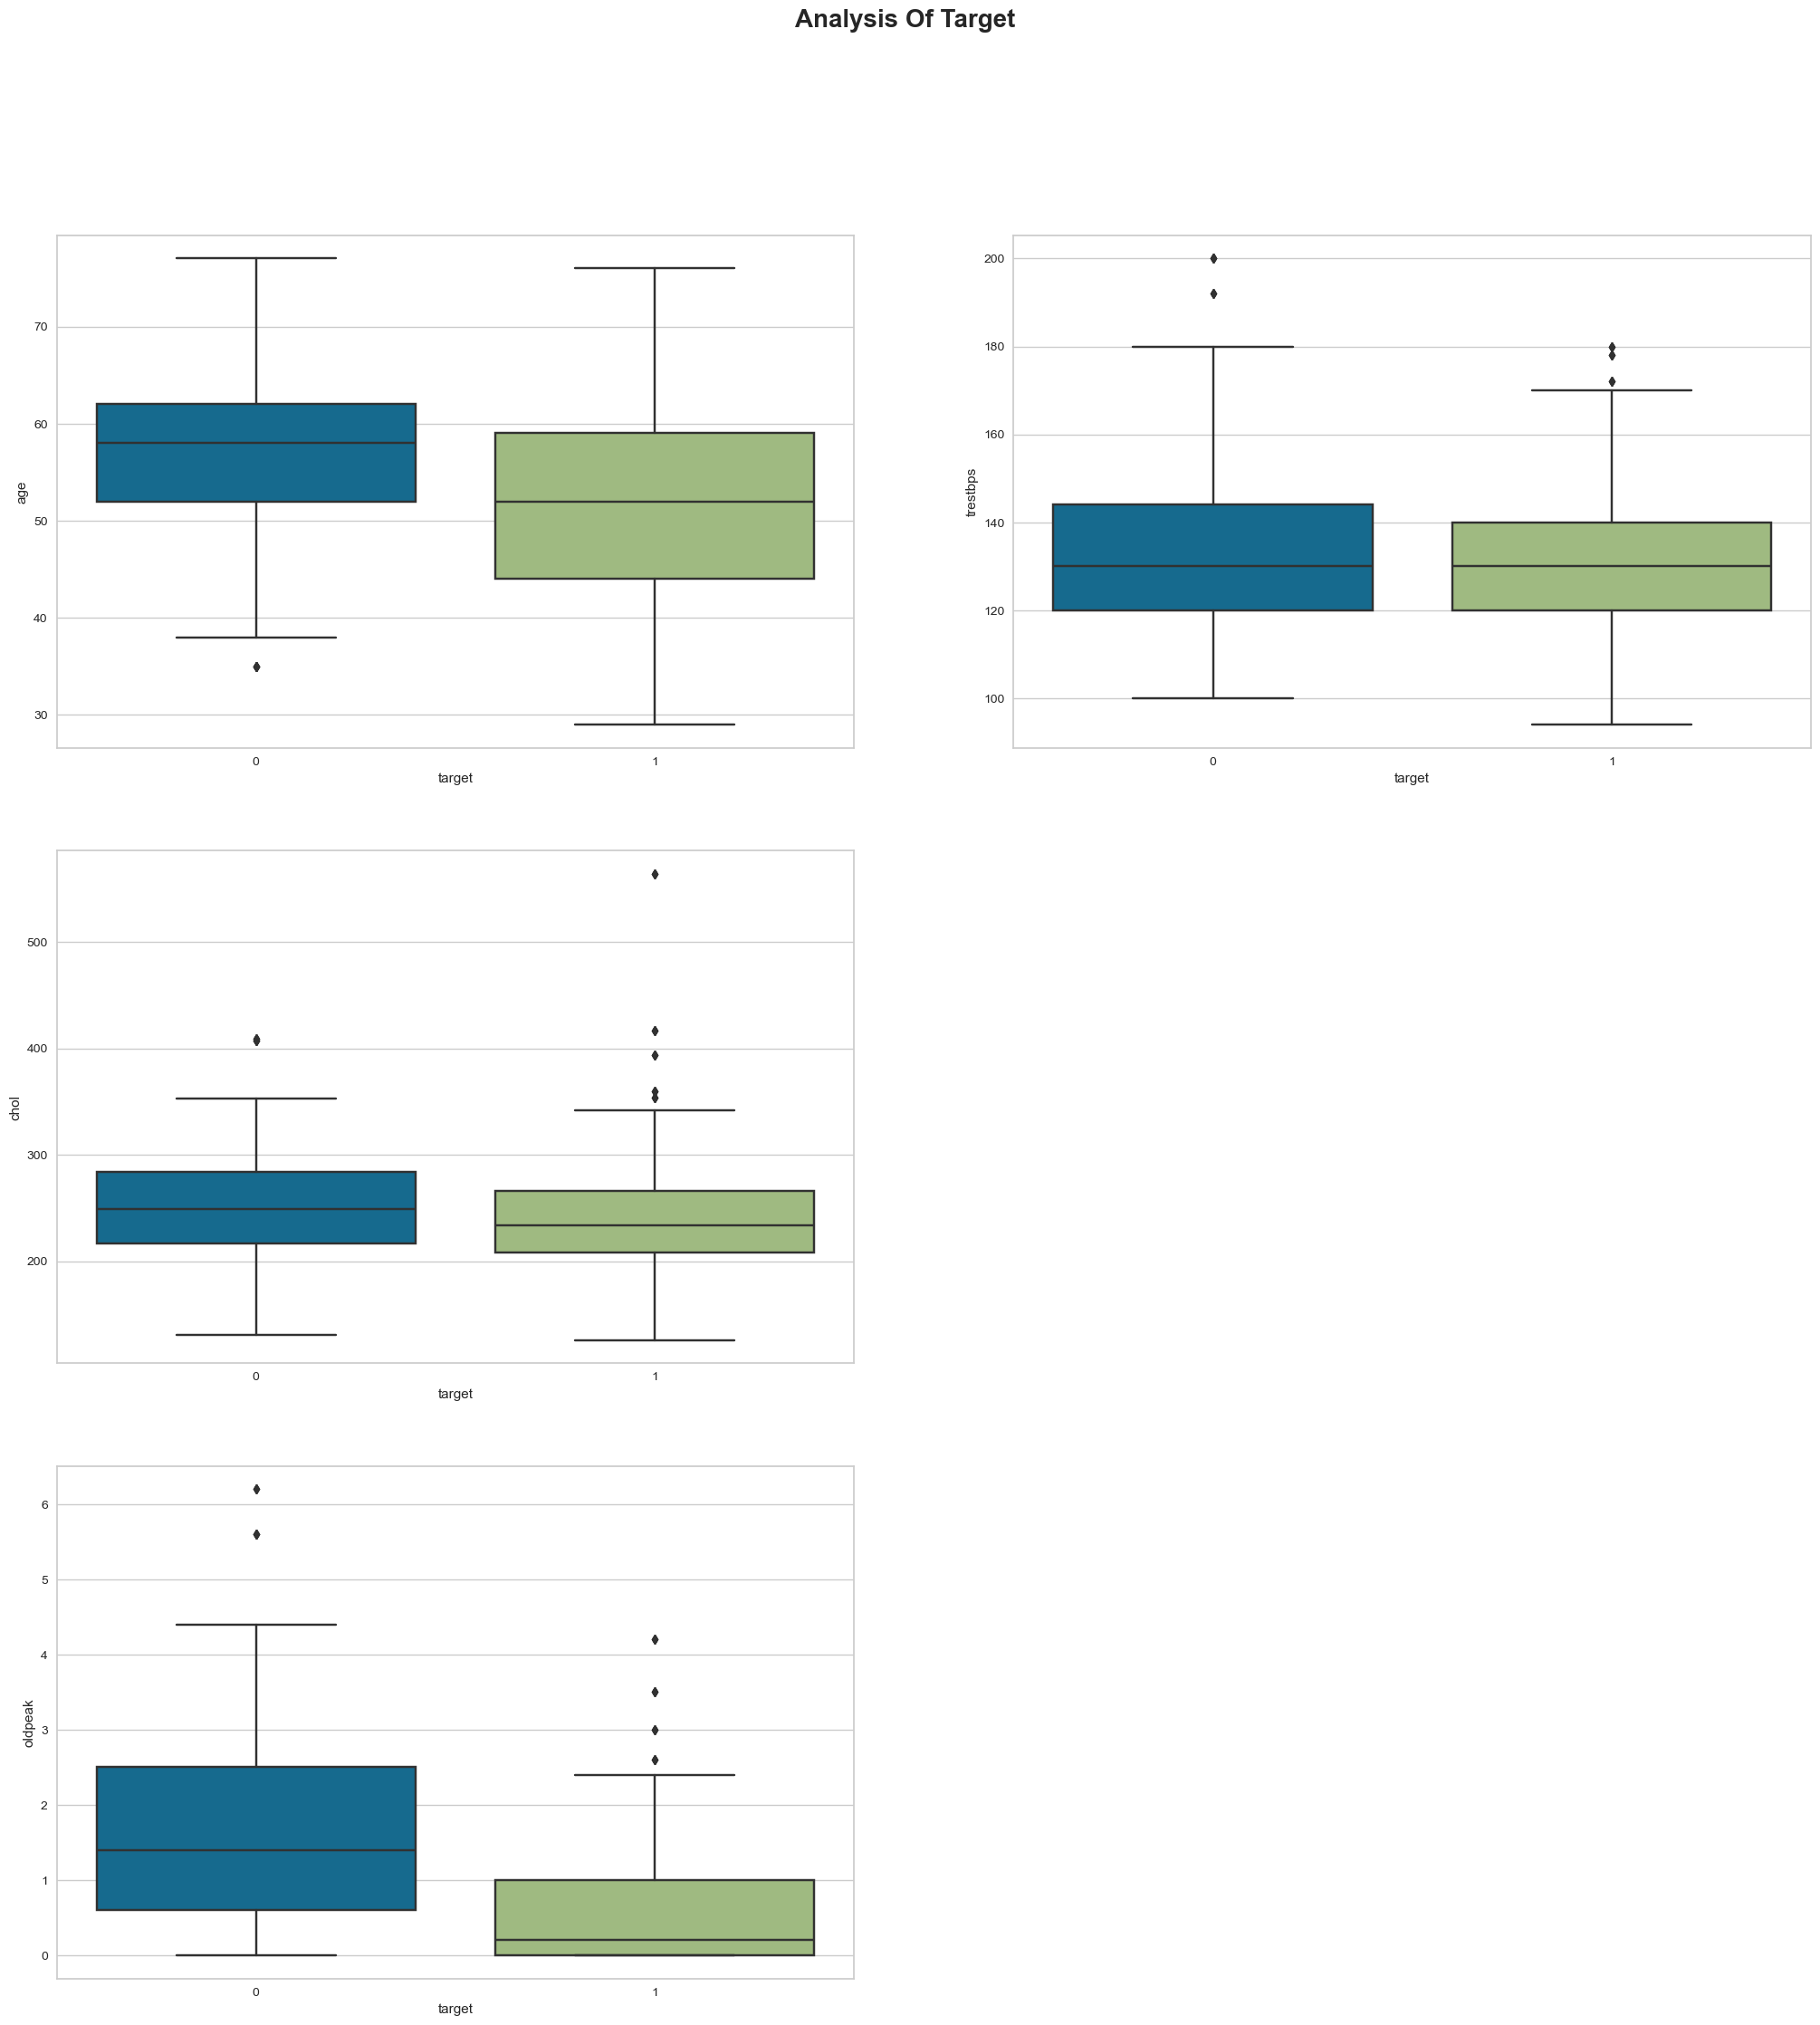

In [63]:
plt.figure(figsize = (25, 25))
plt.suptitle("Analysis Of Target",fontweight="bold", fontsize=20)

plt.subplot(3,2,1)
sns.boxplot(x="target", y="age", data=df)

plt.subplot(3,2,2)
sns.boxplot(x="target", y="trestbps", data=df)

plt.subplot(3,2,3)
sns.boxplot(x="target", y="chol", data=df)

plt.subplot(3,2,5)
sns.boxplot(x="target", y="oldpeak", data=df)

In [65]:
X = df.drop('target', axis = 1)
X = X.values
y = df['target']

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.4, random_state = 0)

0.8414634146341463

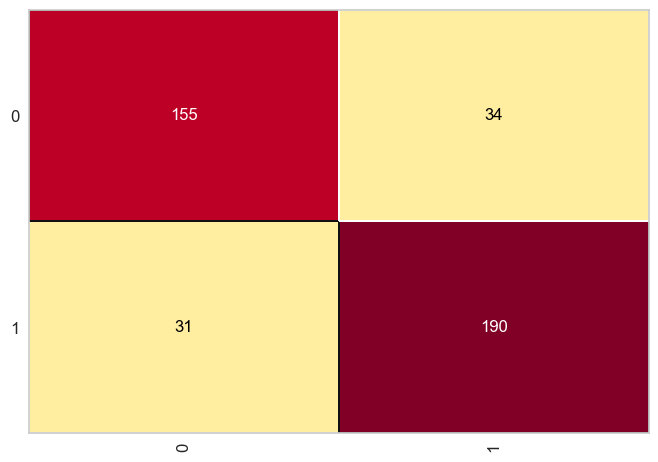

In [68]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
previsoes = naive_bayes.predict(X_test)

cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [69]:
classification_naive_gaussian = (classification_report(y_test, previsoes))
print(classification_naive_gaussian)

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       189
           1       0.85      0.86      0.85       221

    accuracy                           0.84       410
   macro avg       0.84      0.84      0.84       410
weighted avg       0.84      0.84      0.84       410



In [148]:
naive_gaussian = 0.8414634146341463

In [146]:
parameters = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = DecisionTreeClassifier()
gridDecisionTree = RandomizedSearchCV(model, parameters, cv = 5, n_jobs = -1)
gridDecisionTree.fit(X_train, y_train)

print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Mín Split:  3
Max Nvl:  11
Algorithm:  gini
Score:  0.9447154471544715


0.9634146341463414

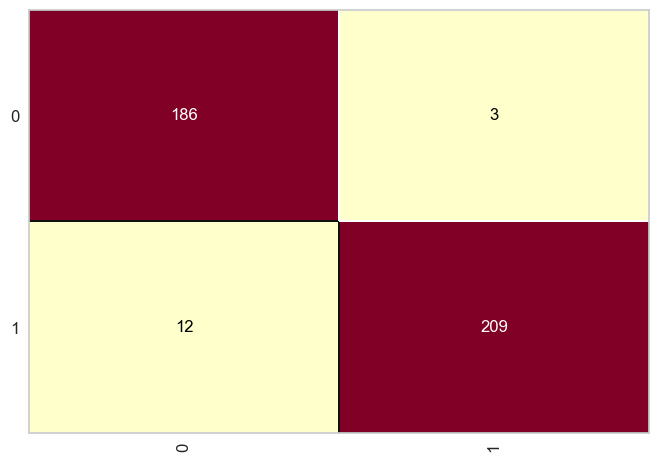

In [147]:
decision_tree = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 4, max_depth= 11, random_state=0)
decision_tree.fit(X_train, y_train)
previsoes = decision_tree.predict(X_test)

cm = ConfusionMatrix(decision_tree)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [76]:
classification_decision = (classification_report(y_test, previsoes))
print(classification_decision)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       189
           1       1.00      0.95      0.97       221

    accuracy                           0.97       410
   macro avg       0.97      0.97      0.97       410
weighted avg       0.97      0.97      0.97       410



In [77]:
score_tree = 0.9707317073170731

In [78]:
columns = df.drop('target', axis = 1).columns
feature_imp = pd.Series(decision_tree.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp

cp          0.190699
ca          0.164944
chol        0.132107
age         0.111830
thal        0.094702
oldpeak     0.071450
thalach     0.065241
trestbps    0.052681
sex         0.043199
exang       0.024664
slope       0.021351
restecg     0.016916
fbs         0.010217
dtype: float64

In [79]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = RandomForestClassifier()
gridRandomForest = RandomizedSearchCV(model, parameters, cv = 5, n_jobs = -1)
gridRandomForest.fit(X_train, y_train)

print('Algorithm: ', gridRandomForest.best_estimator_.criterion)
print('Score: ', gridRandomForest.best_score_)
print('Mín Split: ', gridRandomForest.best_estimator_.min_samples_split)
print('Max Nvl: ', gridRandomForest.best_estimator_.max_depth)

Algorithm:  entropy
Score:  0.9626016260162601
Mín Split:  4
Max Nvl:  9


0.9804878048780488

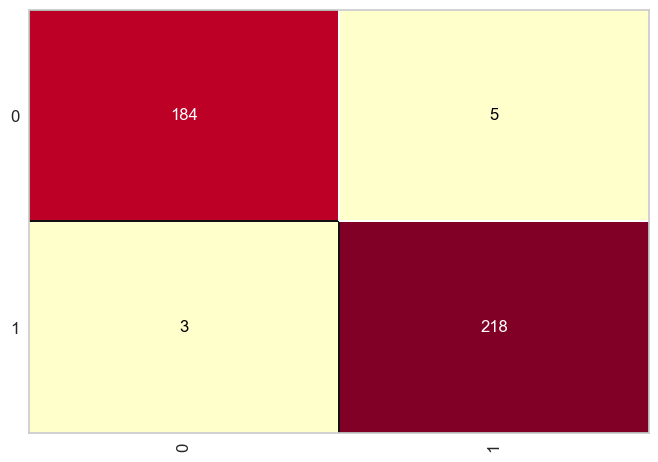

In [83]:
random_forest = RandomForestClassifier(n_estimators = 100, min_samples_split = 4, max_depth= 9,  criterion = 'gini', random_state = 0)
random_forest.fit(X_train, y_train)
previsoes = random_forest.predict(X_test)

cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [84]:
classification_random = (classification_report(y_test, previsoes))
print(classification_random)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       189
           1       0.98      0.99      0.98       221

    accuracy                           0.98       410
   macro avg       0.98      0.98      0.98       410
weighted avg       0.98      0.98      0.98       410



In [122]:
random_score=0.9804878048780488

In [85]:
feature_imp_random = pd.Series(random_forest.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp_random

ca          0.135034
cp          0.131209
thalach     0.108789
oldpeak     0.105421
thal        0.095762
age         0.091446
chol        0.078306
trestbps    0.071065
exang       0.065187
slope       0.046199
sex         0.039424
restecg     0.020961
fbs         0.011196
dtype: float64

In [88]:
from sklearn.ensemble import ExtraTreesClassifier

parameters = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = ExtraTreesClassifier()
gridExtraTrees = RandomizedSearchCV(model, parameters, cv = 3, n_jobs = -1)
gridExtraTrees.fit(X_train, y_train)

print('Algorithm: ', gridExtraTrees.best_estimator_.criterion)
print('Score: ', gridExtraTrees.best_score_)
print('Mín Split: ', gridExtraTrees.best_estimator_.min_samples_split)
print('Max Nvl: ', gridExtraTrees.best_estimator_.max_depth)

Algorithm:  entropy
Score:  0.9528455284552845
Mín Split:  2
Max Nvl:  9


0.9902439024390244

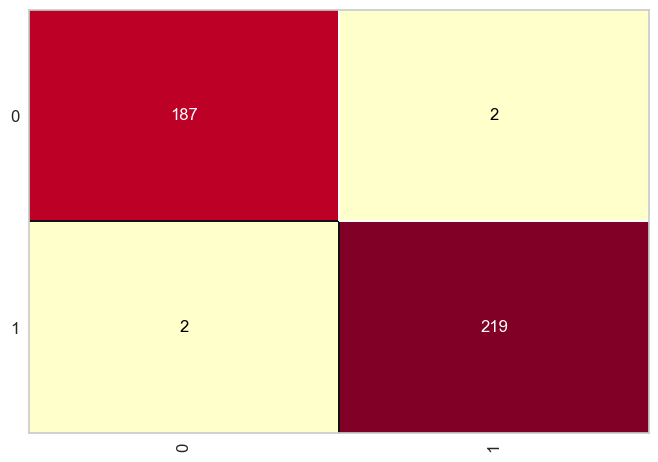

In [92]:
extra_trees = ExtraTreesClassifier(n_estimators = 100, min_samples_split = 6, max_depth= 11, criterion = 'entropy', random_state = 0)
extra_trees.fit(X_train, y_train)
previsoes = extra_trees.predict(X_test)

cm = ConfusionMatrix(extra_trees)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [93]:
classification_extra = (classification_report(y_test, previsoes))
print(classification_extra)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       189
           1       0.99      0.99      0.99       221

    accuracy                           0.99       410
   macro avg       0.99      0.99      0.99       410
weighted avg       0.99      0.99      0.99       410



In [94]:
score_extra = 0.9902439024390244

In [95]:
feature_extra = pd.Series(extra_trees.feature_importances_, index = columns).sort_values(ascending = False)
feature_extra

ca          0.136509
cp          0.119614
thal        0.101087
exang       0.100715
thalach     0.076408
oldpeak     0.075921
sex         0.073073
age         0.070079
slope       0.064296
chol        0.061612
trestbps    0.056120
restecg     0.040013
fbs         0.024551
dtype: float64

In [96]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

k_list = list(range(1,10))
k_values = dict(n_neighbors = k_list)
grid = GridSearchCV(knn, k_values, cv = 3, scoring = 'accuracy', n_jobs = -1)
grid.fit(X_train, y_train)


grid.best_params_, grid.best_score_

({'n_neighbors': 1}, 0.9252032520325204)

0.8780487804878049

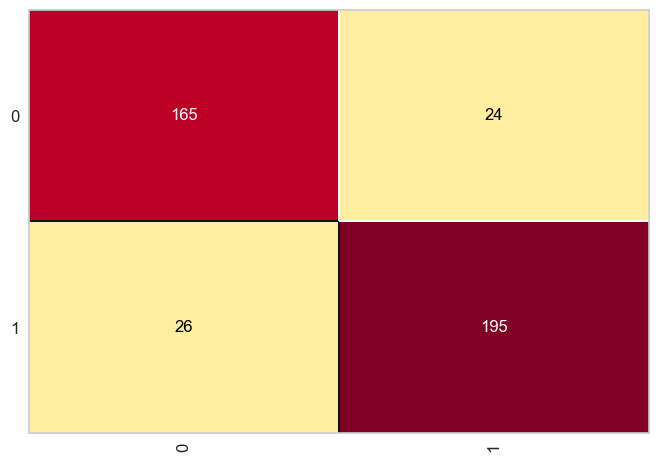

In [97]:
knn = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
previsoes = knn.predict(X_test)

cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [98]:
classification_knn = (classification_report(y_test, previsoes))
print(classification_knn)

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       189
           1       0.89      0.88      0.89       221

    accuracy                           0.88       410
   macro avg       0.88      0.88      0.88       410
weighted avg       0.88      0.88      0.88       410



In [100]:
score_knn = 0.8780487804878049

0.8707317073170732

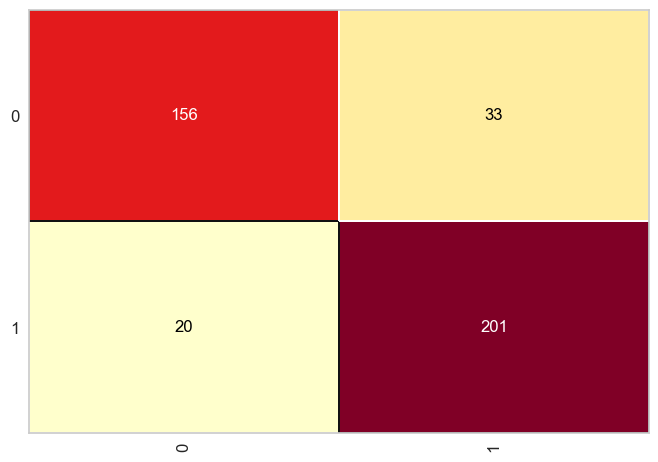

In [101]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = 1, max_iter=10000)
logistic.fit(X_train, y_train)
previsoes = logistic.predict(X_test)

cm = ConfusionMatrix(logistic)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [150]:
logistic_regression = (classification_report(y_test, previsoes))
print(logistic_regression)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       189
           1       0.99      0.95      0.97       221

    accuracy                           0.96       410
   macro avg       0.96      0.96      0.96       410
weighted avg       0.96      0.96      0.96       410



In [149]:
logistic_reg = 0.8707317073170732

In [104]:
from sklearn.ensemble import AdaBoostClassifier

parameters = {'learning_rate': [0.01, 0.02, 0.05, 0.07, 0.09, 0.1, 0.3, 0.001, 0.005],
              'n_estimators': [300, 500]
             }

model = AdaBoostClassifier()
gridAdaBoost = RandomizedSearchCV(model, parameters, cv = 5, n_jobs = -1)
gridAdaBoost.fit(X_train, y_train)

print('Learning Rate: ', gridAdaBoost.best_estimator_.learning_rate)
print('Score: ', gridAdaBoost.best_score_)

Learning Rate:  0.3
Score:  0.9008130081300812


0.9121951219512195

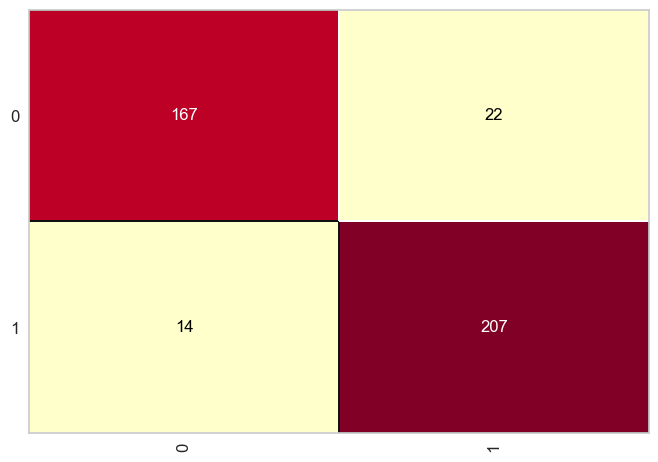

In [105]:
ada_boost = AdaBoostClassifier(n_estimators = 500, learning_rate =  0.1, random_state = 0)
ada_boost.fit(X_train, y_train)
previsoes = ada_boost.predict(X_test)

cm = ConfusionMatrix(ada_boost)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [151]:
classification_ada = (classification_report(y_test, previsoes))
print(classification_ada)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       189
           1       0.99      0.95      0.97       221

    accuracy                           0.96       410
   macro avg       0.96      0.96      0.96       410
weighted avg       0.96      0.96      0.96       410



In [152]:
score_ada = 0.9121951219512195

In [129]:
from sklearn.ensemble import GradientBoostingClassifier

parameters = {'learning_rate': [0.01, 0.02, 0.05, 0.07, 0.09, 0.1, 0.3, 0.5, 0.005],
              'n_estimators': [300, 500]
             }


model = GradientBoostingClassifier()
gridGradient = RandomizedSearchCV(model, parameters, cv = 5, n_jobs = -1)
gridGradient.fit(X_train, y_train)

print('Learning Rate: ', gridGradient.best_estimator_.learning_rate)
print('Score: ', gridGradient.best_score_)

Learning Rate:  0.3
Score:  0.9723577235772358


0.9780487804878049

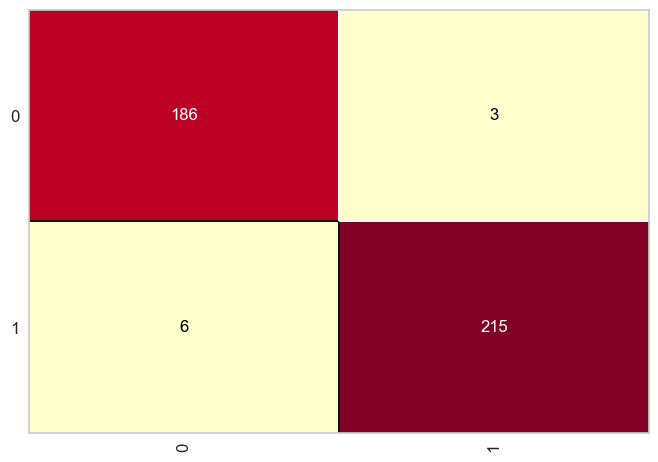

In [143]:
grad_boost = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.05, random_state = 0)
grad_boost.fit(X_train, y_train)
previsoes = grad_boost.predict(X_test)

cm = ConfusionMatrix(grad_boost)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [131]:
classification_gradient_boost = (classification_report(y_test, previsoes))
print(classification_gradient_boost)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       189
           1       0.99      0.97      0.98       221

    accuracy                           0.98       410
   macro avg       0.98      0.98      0.98       410
weighted avg       0.98      0.98      0.98       410



In [132]:
gradient_boost = 0.9780487804878049

In [153]:
Naive_dict_v1 = {'Model':'Naive Bayes',
               'Type':'Gaussian',
               'Precision':naive_gaussian}

Decision_dict = {'Model':'Decision Tree',
               'Type': 'Gini',
               'Precision':score_tree}

Random_dict = {'Model':'Random Forest',
               'Type': 'Gini',
               'Precision':random_score}

Extra_dict = {'Model':'Extra Trees',
               'Type': 'Gini',
               'Precision':score_extra}


KNN_dict_v2 = {'Model':'KNN',
               'Type':'-',
               'Precision':score_knn}

Logistic_dict_v1 = {'Model':'Logistic Regression',
            
               'Type':'-',
               'Precision':logistic_reg}

ada_dict_v1 = {'Model':'AdaBoost',
               'Type':'-',
               'Precision':score_ada}

grad_dict_v1 = {'Model':'GradientBoost',
               'Type':'-',
               'Precision':gradient_boost}

In [154]:
resume = pd.DataFrame({'Naive Bayes':pd.Series(Naive_dict_v1),
                       'Decision Tree':pd.Series(Decision_dict),
                       'Random Forest':pd.Series(Random_dict),
                       'Extra Trees':pd.Series(Extra_dict),
                       'KNN':pd.Series(KNN_dict_v2),
                       'Logistic Regression':pd.Series(Logistic_dict_v1),
                       'AdaBoost':pd.Series(ada_dict_v1),
                       'GradientBoosting':pd.Series(grad_dict_v1)
                      })

In [155]:
resume

,Naive Bayes,Decision Tree,Random Forest,Extra Trees,KNN,Logistic Regression,AdaBoost,GradientBoosting
Model,Naive Bayes,Decision Tree,Random Forest,Extra Trees,KNN,Logistic Regression,AdaBoost,GradientBoost
Type,Gaussian,Gini,Gini,Gini,-,-,-,-
Precision,0.841463,0.970732,0.980488,0.990244,0.878049,0.870732,0.912195,0.978049
